## Decision Trees on Iris dataset

Credit from:  Module 8 - Lesson 3

First, we import the necessary libraries:

In [34]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [35]:
import numpy as np
import pylab as pl
import pandas as pd

from sklearn.datasets import load_iris

# Solution 1

Below is the Iris dataset that represents 4 attributes petal length, petal width, sepal length and sepal width of flowers - these attributes help classify the flowers into 3 target classes - namely Setosa, Versicolor, Virginica. The class distribution is almost 33.33%. There are all total of 150 instances. The nature of the data is numeric. The interesting idea I find behind this dataset is that just based on the lengths we can actually categorize the flowers. Below you can find more details of the dataset.

In [3]:
# Load data
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
colNames = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name']
data = pd.read_csv(fileURL, names=colNames, header=None)
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Solution 2

The dataset have missing values marked by 'None'. All of its 4 features are numeric in nature. Below is some statistics regarding the dataset which might be insightful.

In [5]:
data_stats = data.describe().transpose()
data_stats

,count,mean,std,min,25%,50%,75%,max
Sepal Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal Length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal Width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


Some good data visualizations will be plotting the data in histograms

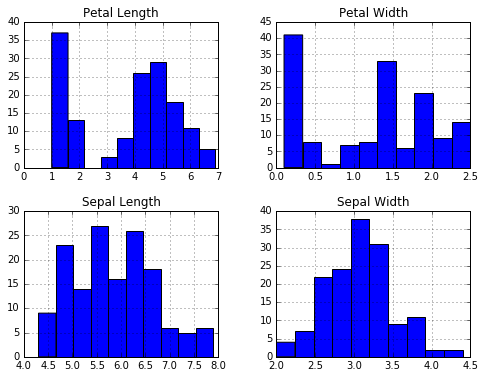

In [4]:
hist = data.ix[:,0:4].hist(figsize=(8,6))

# Solution 3

Now we train the iris data using the scikit-learn DecisionTreeClassifier

In [14]:
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

# Solution 4

Next after the data has been trained I export it using GraphViz tool to generate the visualization of the decision tree

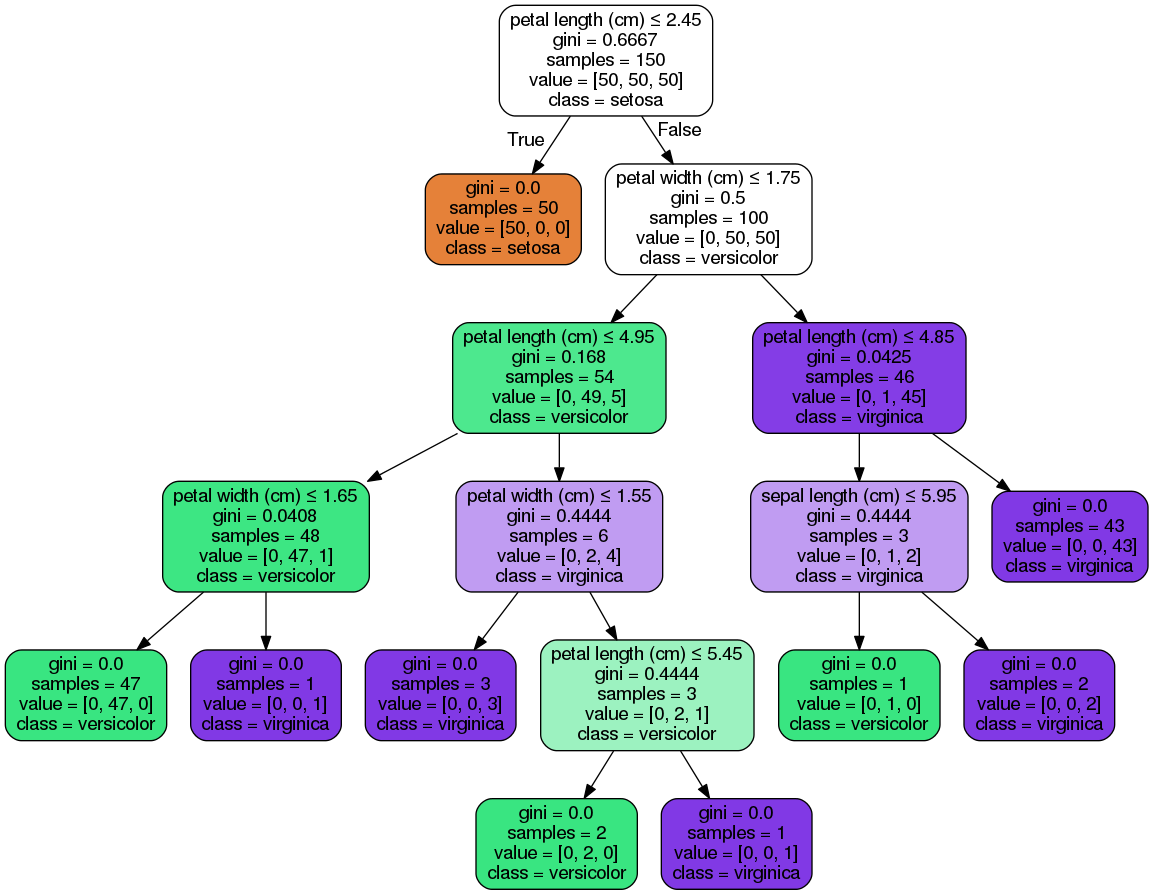

In [15]:
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

# Solution 5:

Based on the above decision tree now I predict the class of a test datasets and see the results as below. We create the test instance test_data such that it is around the mean of the individual features and then try to predict it using the generated decision tree classifier.

In [32]:
test_data = [5.65, 2.2, 4.9, 0.2]
clf.predict([test_data])

array([1])

Walkthrough the decision tree:
At first the (petal length<=2.45) is False so it goes right then (petal width<=1.75) is True so it goes left, then (petal length <=4.95) is True so it goes left, then (petal width <= 1.65) is True so it goes left and finally reaches the leaf node which classifies it as 'versicolor'.

It appears that there might be some error due to the initial value chosen for the petal width = 0.2 which is having a huge variance in the dataset for that particular feature. The classification is correct as per the above decision tree. There can be improvement done in the classifier by using metrics such as ROC or evaluating the classifier using coverage, accuracy, etc. metrics.